In [322]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import random 
import matplotlib.pyplot as plt
data = pd.read_csv('weight-height.csv') 

Link of the data :https://www.kaggle.com/mustafaali96/weight-height

# Made by Kwon (kakaotalk id: 'kwon030520')

In [320]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [321]:
data.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [318]:
#This code is feasible only when there is two coefficient
def linear_regression(data):
    
    df_male = data.loc[data['Gender'] =="Male"]
    df_female = data.loc[data['Gender'] == 'Female']
    
    df_male = df_male.reset_index(drop =True)
    df_female = df_female.reset_index(drop =True)
    #getting training datasets
    
    Y_m, X_m = df_male.shape
    Y_f, X_f = df_female.shape

    random_male =  random.sample(range(Y_m), 100)
    random_female = random.sample(range(Y_f), 100)
    
    
    for i in range (len(random_male)):
        if (i == 0):
            df_train_male = df_male.iloc[random_male[i]:random_male[i]+1]     
        elif (i != 0):
            selected = df_male.iloc[random_male[i]:random_male[i]+1]
            df_train_male = pd.concat([df_train_male, selected])
            
    for i in range (len(random_female)):
        if (i == 0):
            df_train_female = df_female.iloc[random_female[i]: random_female[i]+1]
        elif (i != 0):
            selected = df_female.iloc[random_female[i]: random_female[i]+1]
            df_train_female = pd.concat([df_train_female, selected])
    
    #Reset the index
    df_train_male = df_train_male.reset_index(drop = True)
    df_train_female = df_train_female.reset_index(drop = True)
    
    #Math stuff lets say that height is x and weight is y
    
    #sum of X
    total_Xm = 0
    for i in range (len(df_train_male)):
        total_Xm = total_Xm + df_train_male['Height'][i]
        
    total_Xf = 0 
    for i in range (len(df_train_female)):
        total_Xf = total_Xf + df_train_female['Height'][i]
    
    #sum of XY
    total_XYm = 0
    for i in range (len(df_train_male)):
        total_XYm = total_XYm + (df_train_male['Height'][i] * df_train_male['Weight'][i]) 
    
    total_XYf = 0 
    for i in range (len(df_train_female)):
        total_XYf = total_XYf + (df_train_female['Height'][i]) * df_train_female['Weight'][i]
    
    #Sum of Y
    total_Ym = 0 
    for i in range (len(df_train_male)):
        total_Ym = total_Ym + (df_train_male['Weight'][i])
    
    total_Yf = 0 
    for i in range (len(df_train_female)):
        total_Yf = total_Yf + (df_train_female['Weight'][i])
        
    #Sum of X^2
    total_X2m = 0
    for i in range (len(df_train_male)):
        total_X2m = total_X2m + (df_train_male['Height'][i] * df_train_male['Height'][i])
    
    total_X2f = 0 
    for i in range (len(df_train_female)):
        total_X2f = total_X2f + ((df_train_female['Height'][i])**2)
    
    #Sum of Y^2
    total_Y2m = 0 
    for i in range (len(df_train_male)):
        total_Y2m = total_Y2m + (df_train_male ['Weight'][i]* df_train_male['Weight'][i])
    
    total_Y2f = 0
    for i in range (len(df_train_female)):
        total_Y2f = total_Y2f + ((df_train_female['Weight'][i])**2)
        
    #Finding m (the slope)
    Mm = (((len(df_train_male) * total_XYm) - (total_Xm * total_Ym)))/ ( (len(df_train_male) * total_X2m) - (total_Xm * total_Xm)) 

    Mf = (((len(df_train_female) * total_XYf) - (total_Xf * total_Yf)))/ ( (len(df_train_female) * total_X2f) - (total_Xf * total_Xf)) 

    #Finding b (the y intercept)
    
    Bm = (total_Ym - (Mm * total_Xm))/ len(df_train_male)

    Bf = (total_Yf - (Mf * total_Xf))/ len(df_train_female)
    
    #Finding R 
    Rm = ( (len(df_train_male) * total_XYm) - (total_Xm * total_Ym) )
    sm = ((len(df_train_male) * total_X2m) - (total_Xm * total_Xm)) * ((len(df_train_male) * total_Y2m) - (total_Ym * total_Ym)) 
    Rm = Rm/ (sm**0.5)
    
    Rf = ( (len(df_train_female) * total_XYf) - (total_Xf * total_Yf) )
    sf = ((len(df_train_female) * total_X2f) - (total_Xf * total_Xf)) * ((len(df_train_female) * total_Y2f) - (total_Yf * total_Yf)) 
    Rf = Rf/ (sf**0.5)

    plt.scatter(df_train_male['Height'], df_train_male['Weight'], label = 'stars', color = 'blue', marker= '*', s=30)
    plt.title('Weight vs Height / male')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show()
    
    plt.scatter(df_train_female['Height'], df_train_female['Weight'], label = 'stars', color = 'blue', marker= '*', s=30)
    plt.title('Weight vs Height / female')
    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.show()
    #Checking the accuracy
    
    count = 0
    for i in range (len(df_male)):
        value = Mm*df_male['Height'][i]+Bm
        if (value > df_male['Weight'][i] * 0.90 and value <  df_male['Weight'][i] * 1.10):
            count = count + 1
    print(count/ (len(df_male)))
    
    count = 0
    for i in range (len(df_female)):
        value = Mf*df_female['Height'][i]+Bf
        if (value > df_female['Weight'][i] * 0.90 and value <  df_female['Weight'][i] * 1.10):
            count = count + 1
    return (count/ (len(df_female)))

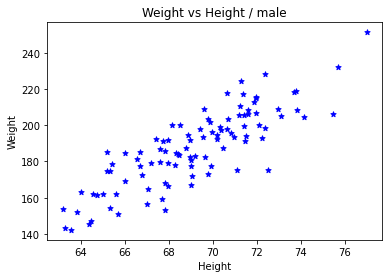

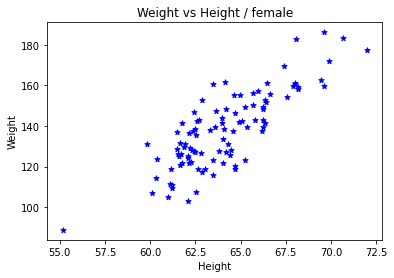

0.9354


0.8198

In [319]:
linear_regression(data)